In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pip install imbalanced-learn


In [ ]:
df = pd.read_excel('RHEA_Compoisiton_Phases_final.xlsx',sheet_name='Sheet3')
df

,∆Smix,VEC,∆Hmix,δ,∆χ,Tm,Ω,Phases
0,15.838895,5.0751,-1.292768,6.516115,0.069677,2706.7361,33.162726,0
1,15.816705,5.0896,-1.440274,6.530060,0.070283,2706.7511,29.724827,0
2,15.976146,5.0406,-1.559260,6.529641,0.072446,2706.7631,27.733433,0
3,15.899562,5.0690,-1.160736,6.321400,0.068315,2706.9350,37.079114,0
4,15.926044,5.0756,-1.190143,6.440156,0.070199,2707.0799,36.225118,0
...,...,...,...,...,...,...,...,...
696,15.449014,5.1444,-0.974237,6.423613,0.068208,2705.4693,42.902108,1
697,15.486818,5.1428,-1.234951,6.550120,0.069110,2709.3200,33.976037,1
698,15.595083,5.1267,-1.315170,6.439683,0.068149,2713.1010,32.171531,1
699,15.621185,5.1362,-1.238441,6.447341,0.068722,2722.6266,34.342103,1


<Axes: xlabel='Phases', ylabel='count'>

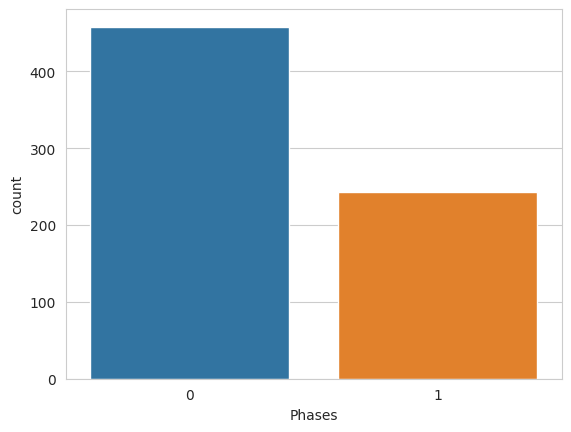

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Phases',data=df)

In [ ]:
df['Phases'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
696    1
697    1
698    1
699    1
700    1
Name: Phases, Length: 701, dtype: int64>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Phases',axis=1),df['Phases'], test_size=0.30,
                                                    random_state=101)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gradient_booster.fit(X_train,y_train)
from sklearn.metrics import classification_report
print(classification_report(y_test,gradient_booster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       146
           1       0.83      0.95      0.89        65

    accuracy                           0.92       211
   macro avg       0.90      0.93      0.91       211
weighted avg       0.93      0.92      0.93       211



In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.955
Accuracy score (validation): 0.910
Learning rate:  0.075
Accuracy score (training): 0.959
Accuracy score (validation): 0.905
Learning rate:  0.1
Accuracy score (training): 0.959
Accuracy score (validation): 0.905
Learning rate:  0.25
Accuracy score (training): 0.967
Accuracy score (validation): 0.919
Learning rate:  0.5
Accuracy score (training): 0.992
Accuracy score (validation): 0.924
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.915
Learning rate:  1
Accuracy score (training): 0.996
Accuracy score (validation): 0.910


In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[133  13]
 [  5  60]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       146
           1       0.82      0.92      0.87        65

    accuracy                           0.91       211
   macro avg       0.89      0.92      0.90       211
weighted avg       0.92      0.91      0.92       211



In [ ]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']

In [ ]:
display(cv)

Best parameters are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}




In [ ]:
res=cv.predict(X_test)

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_features=2, max_depth=1)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
GB_test=accuracy_score(y_test,predictions)
GB_test

0.9146919431279621

In [ ]:
gb_clf2.score(X_train,y_train)

0.9979591836734694

In [ ]:
import sklearn
sklearn.metrics.f1_score(y_test, predictions)

0.8656716417910447

In [ ]:
cm=print(confusion_matrix(y_test,predictions))
cm=confusion_matrix(y_test,predictions)

[[135  11]
 [  7  58]]


[Text(0.5, 37.7222222222222, 'Predicted Classes'),
 Text(85.72222222222221, 0.5, 'Actual Classes')]

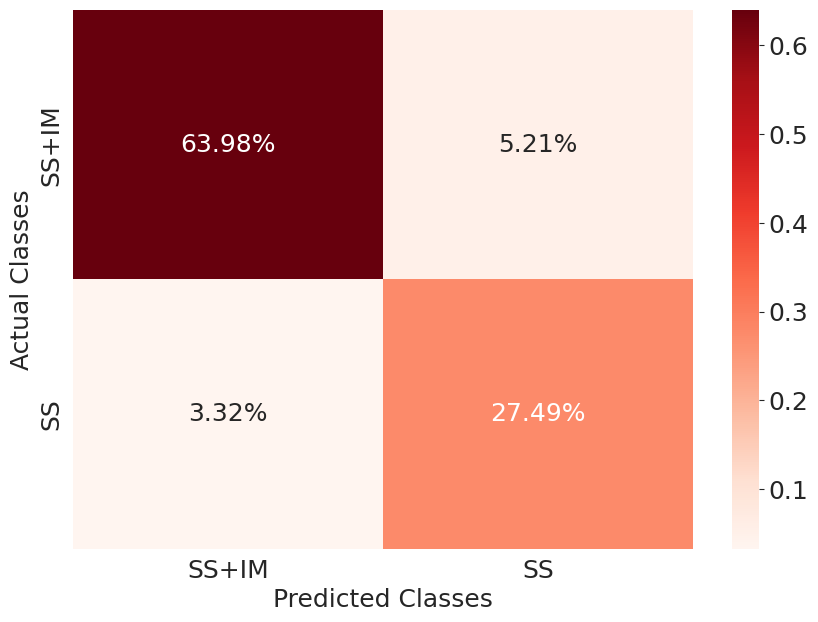

In [ ]:
plt.rcParams.update({'font.size': 18})
cfm=[[0.85 , 0.03,],
  [ 0.015, 0.105]]
cm=confusion_matrix(y_test,predictions)
cfm=cm/211

classes =["SS+IM","SS"]
classes_n=["SS+IM","SS"]
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes_n)
plt.figure(figsize = (10,7))
cfm_plot = sns.heatmap(df_cfm, annot=True,cmap ="Reds",fmt='.2%')
cfm_plot.figure.savefig("cfm.png")
cfm_plot.set(xlabel='Predicted Classes', ylabel='Actual Classes')

In [ ]:
feature_names=('∆Smix','VEC','∆Hmix','δ','∆χ','Tm','Ω')
importance10=gb_clf2.feature_importances_
imp10=pd.DataFrame({'feature_names':feature_names,'Importances':importance10})
imp10.sort_values(by='Importances')

,feature_names,Importances
2,∆Hmix,0.000720
6,Ω,0.038416
0,∆Smix,0.048044
3,δ,0.076623
5,Tm,0.131350
4,∆χ,0.246431
1,VEC,0.458417


In [ ]:
accuracy_score(y_test,res)

0.9146919431279621

In [ ]:
cv.score(X_train,y_train)

0.9959183673469387

In [ ]:
gb_clf2.score(X_train,y_train)

0.9979591836734694

In [ ]:
accuracy_score(y_test,predictions)

0.9146919431279621

In [ ]:
import sklearn
sklearn.metrics.f1_score(y_test,predictions)

0.8656716417910447

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_clf.score(X_train,y_train)

1.0

In [ ]:
score = xgb_clf.score(X_test, y_test)
print(score)

0.9383886255924171


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions1 = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       146
           1       0.58      0.69      0.63        65

    accuracy                           0.75       211
   macro avg       0.71      0.73      0.72       211
weighted avg       0.77      0.75      0.75       211



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions1)

0.7488151658767772

In [ ]:

sklearn.metrics.f1_score(y_test,predictions1)

0.6293706293706293

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logmodel, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.83673469 0.79591837 0.81632653 0.89795918 0.7755102  0.85714286
 0.87755102 0.85714286 0.79591837 0.85714286]


In [ ]:
scores = pd.Series(scores)
scores.mean()

0.8367346938775511

In [ ]:
logmodel.score(X_train,y_train)

0.8428571428571429

In [ ]:
print(confusion_matrix(y_test,predictions1))
cm=confusion_matrix(y_test,predictions)

[[113  33]
 [ 20  45]]


[Text(0.5, 37.7222222222222, 'Predicted Classes'),
 Text(85.72222222222221, 0.5, 'Actual Classes')]

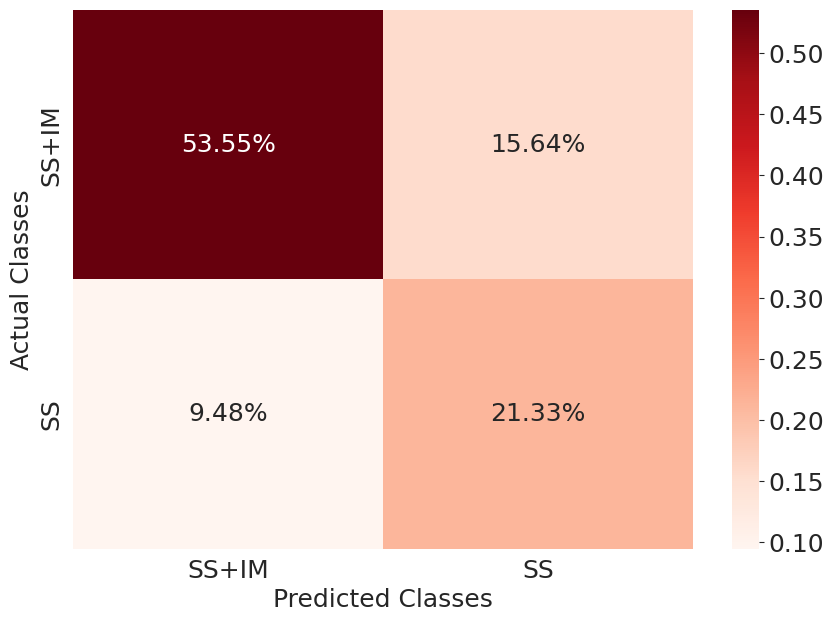

In [ ]:
cm=confusion_matrix(y_test,predictions1)
cfm=cm/211
#cfm=[[0.8783, 0.0016,],
 #[ 0.0933, 0.0267]]


classes =["SS+IM","SS"]
classes_n=["SS+IM","SS"]
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes_n)
plt.figure(figsize = (10,7))
cfm_plot = sns.heatmap(df_cfm, annot=True,cmap ="Reds",fmt='.2%')
cfm_plot.figure.savefig("cfm.png")
cfm_plot.set(xlabel='Predicted Classes', ylabel='Actual Classes')

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
importance1 = logmodel.coef_[0]
feature_names=('∆Smix','VEC','∆Hmix','δ','∆χ','Tm','Ω')

In [ ]:
importances = pd.DataFrame(data={
    'Feature_names':feature_names,
    'Importance': importance1
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Feature_names,Importance
0,∆Smix,3.709017
3,δ,3.490195
4,∆χ,0.066569
5,Tm,-0.028479
1,VEC,-0.096038
6,Ω,-0.237207
2,∆Hmix,-0.442025


In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
predictions2 = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions2))


[[146   0]
 [ 65   0]]


In [ ]:
sklearn.metrics.f1_score(y_test,predictions2)


0.0

In [ ]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       146
           1       0.00      0.00      0.00        65

    accuracy                           0.69       211
   macro avg       0.35      0.50      0.41       211
weighted avg       0.48      0.69      0.57       211



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions2)

0.6919431279620853

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.653 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.878 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))
cm=confusion_matrix(y_test,predictions)

[[118  28]
 [ 10  55]]


[Text(0.5, 37.7222222222222, 'Predicted Classes'),
 Text(85.72222222222221, 0.5, 'Actual Classes')]

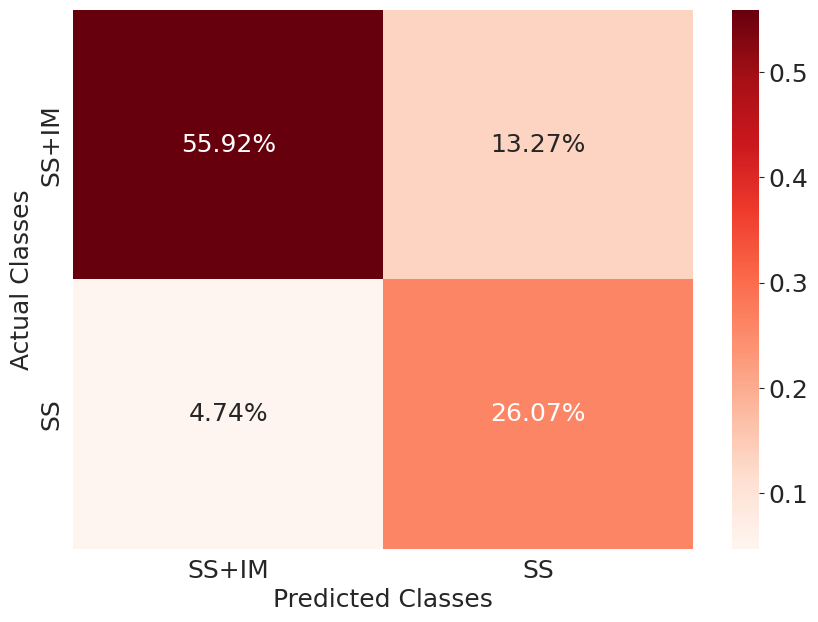

In [ ]:


cfm=confusion_matrix(y_test,grid_predictions)
cfm=cfm/211


classes =["SS+IM","SS"]
classes_n=["SS+IM","SS"]
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes_n)
plt.figure(figsize = (10,7))
cfm_plot = sns.heatmap(df_cfm, annot=True,cmap ="Reds",fmt='.2%')
cfm_plot.figure.savefig("cfm.png")
cfm_plot.set(xlabel='Predicted Classes', ylabel='Actual Classes')


In [ ]:
sklearn.metrics.f1_score(y_test,grid_predictions)

0.7432432432432433

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       146
           1       0.66      0.85      0.74        65

    accuracy                           0.82       211
   macro avg       0.79      0.83      0.80       211
weighted avg       0.84      0.82      0.82       211



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,grid_predictions)

0.8199052132701422

In [ ]:
grid.score(X_train,y_train)

0.9020408163265307

In [ ]:
importance1 = logmodel.coef_[0]
feature_names=('∆Smix','VEC','∆Hmix','δ','∆χ','Tm','Ω')

In [ ]:
importances = pd.DataFrame(data={
    'Feature_names':feature_names,
    'Importance': importance1
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Feature_names,Importance
0,∆Smix,3.709017
3,δ,3.490195
4,∆χ,0.066569
5,Tm,-0.028479
1,VEC,-0.096038
6,Ω,-0.237207
2,∆Hmix,-0.442025


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

# Will take some time
for i in range(1,20):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

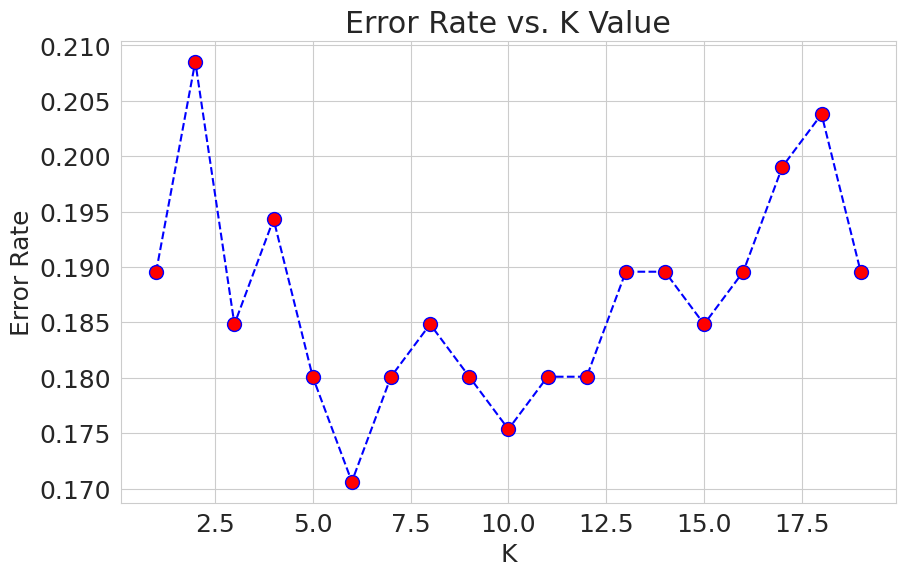

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# NOW WITH K=25
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
pred3 = knn.predict(X_test)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test,pred3))
print('\n')
print(classification_report(y_test,pred3))

WITH K=4


[[124  22]
 [ 19  46]]


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       146
           1       0.68      0.71      0.69        65

    accuracy                           0.81       211
   macro avg       0.77      0.78      0.77       211
weighted avg       0.81      0.81      0.81       211



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred3)

0.8056872037914692

In [ ]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [ ]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [ ]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.8244898  0.8122449  0.85714286 0.85510204 0.87959184 0.87959184
 0.88571429 0.8755102  0.88163265 0.87346939 0.88163265 0.88163265
 0.88163265 0.87959184 0.88163265 0.8755102  0.87346939 0.8755102
 0.87755102 0.8755102  0.87346939 0.8755102  0.87755102 0.87755102
 0.87346939 0.87755102 0.86530612 0.86938776 0.86734694 0.86938776]


In [ ]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.8857142857142856
{'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)


In [ ]:
grid.score(X_test,y_test)

0.8199052132701422

In [ ]:
pred = grid.predict(X_test)

In [ ]:
grid.score(X_train,y_train)

0.9061224489795918

In [ ]:
sklearn.metrics.f1_score(y_test,pred)

0.7361111111111112

In [ ]:
print(confusion_matrix(y_test,pred))
cfm=confusion_matrix(y_test,grid_predictions)

[[120  26]
 [ 12  53]]


[Text(0.5, 37.7222222222222, 'Predicted Classes'),
 Text(85.72222222222221, 0.5, 'Actual Classes')]

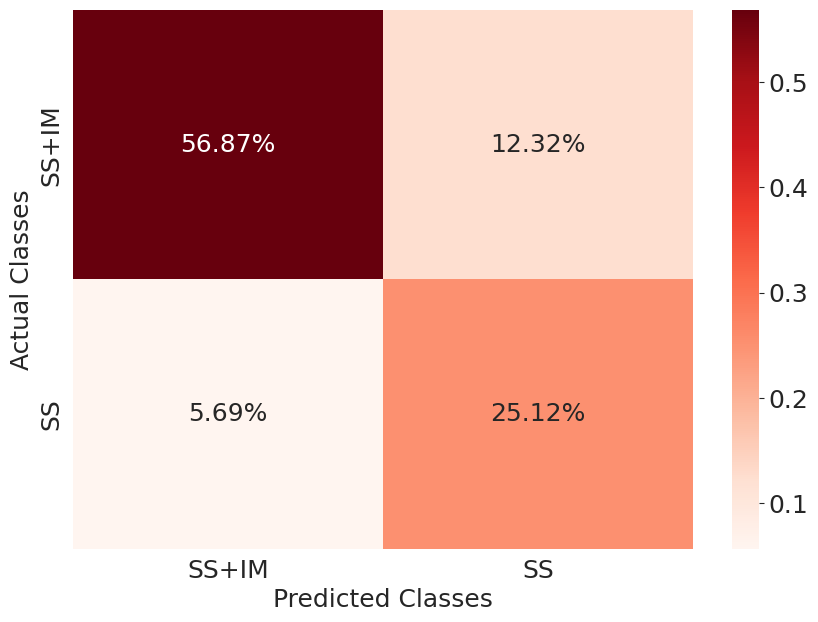

In [ ]:
cfm=confusion_matrix(y_test,pred)/211


classes =["SS+IM","SS"]
classes_n=["SS+IM","SS"]
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes_n)
plt.figure(figsize = (10,7))
cfm_plot = sns.heatmap(df_cfm, annot=True,cmap ="Reds",fmt='.2%')
cfm_plot.figure.savefig("cfm.png")
cfm_plot.set(xlabel='Predicted Classes', ylabel='Actual Classes')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions4 = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions4))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       146
           1       0.78      0.88      0.83        65

    accuracy                           0.89       211
   macro avg       0.86      0.88      0.87       211
weighted avg       0.89      0.89      0.89       211



In [ ]:
print(confusion_matrix(y_test,predictions4))

[[130  16]
 [  8  57]]


In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['VEC', '∆Hmix', 'δ', '∆χ', 'Tm', 'Ω', 'Phases']

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions4)

0.8862559241706162

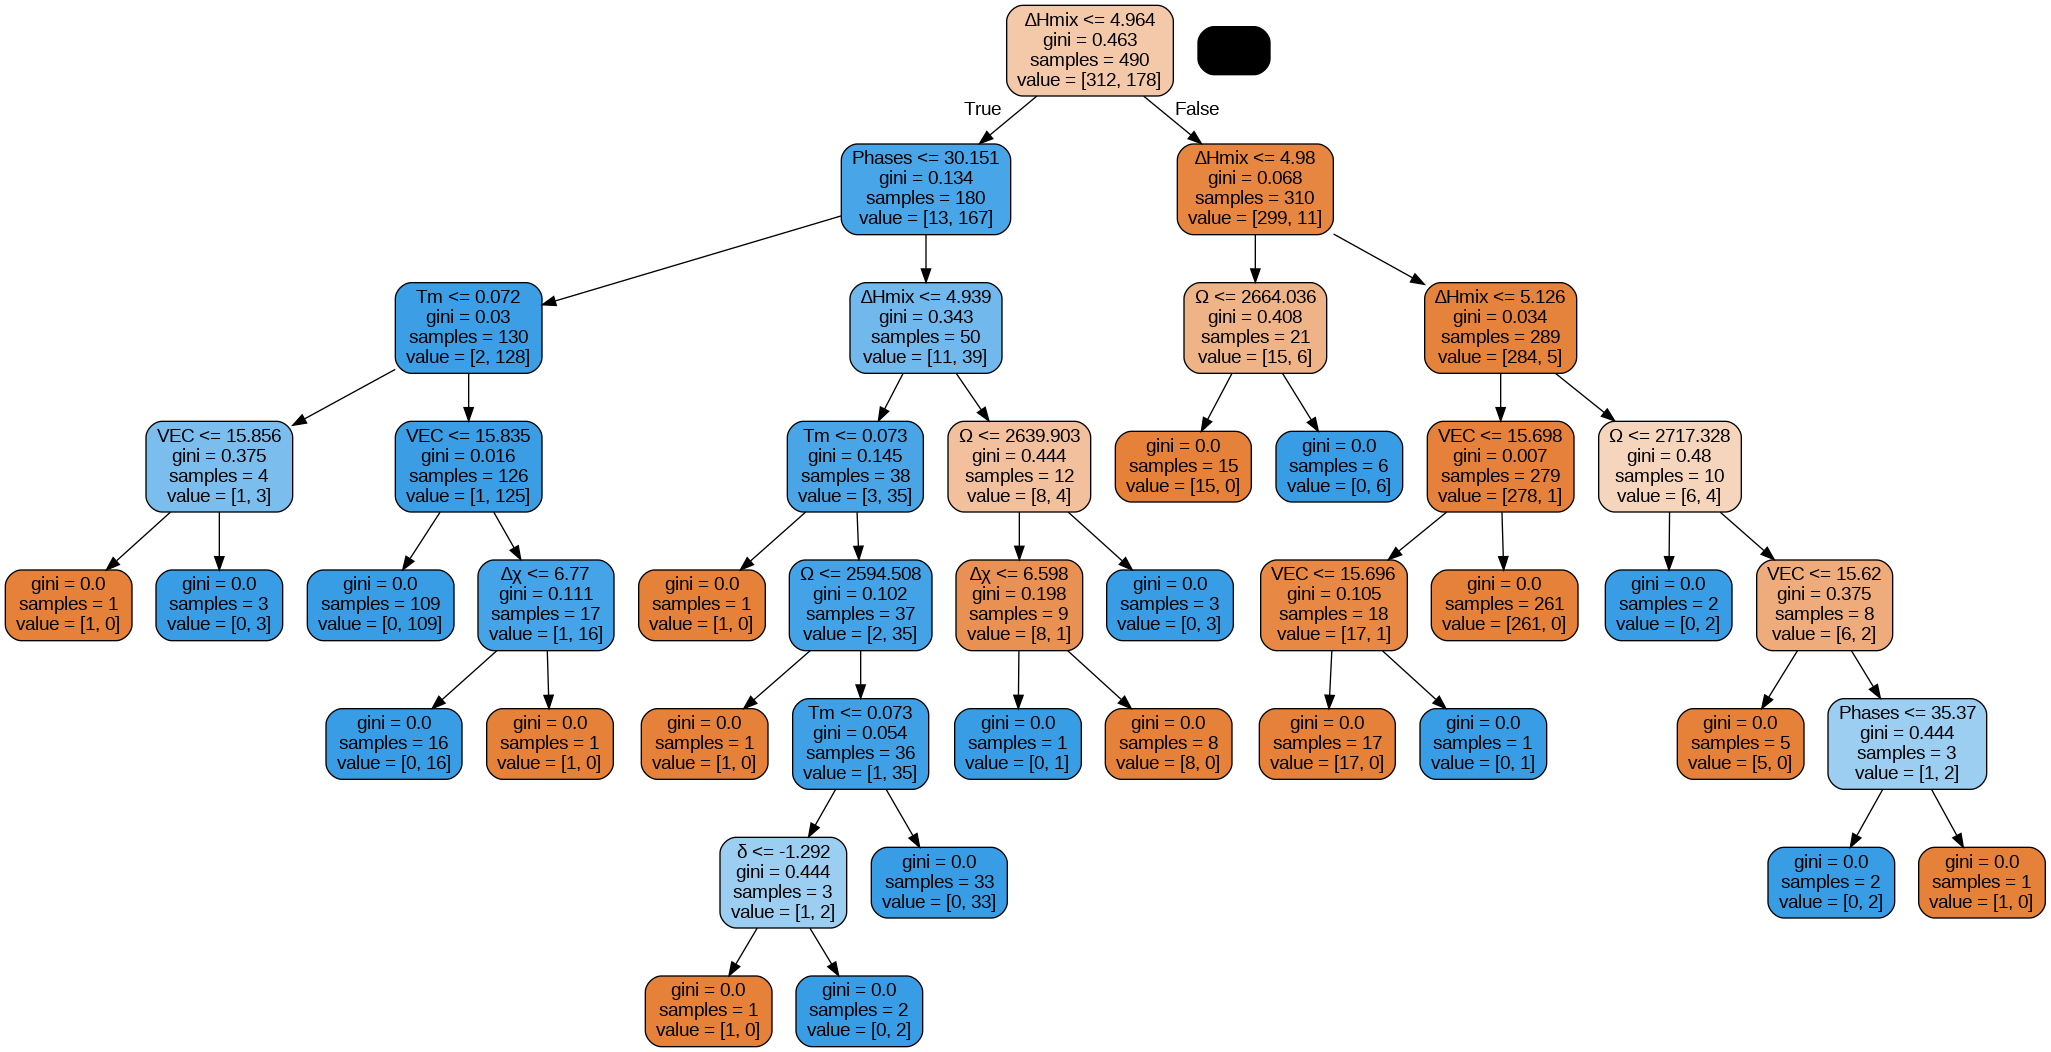

In [ ]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=6, random_state=42)

In [ ]:
grid_search_cv.best_params_

{'max_leaf_nodes': 6, 'min_samples_split': 2}

In [ ]:
print(grid_search_cv.best_score_)

0.9469175519976059


In [ ]:
print(f'Train Accuracy - : {grid_search_cv.score(X_train,y_train):.3f}')
print(f'Test Accuracy - : {grid_search_cv.score(X_test,y_test):.3f}')

Train Accuracy - : 0.965
Test Accuracy - : 0.915


In [ ]:
dtree=grid_search_cv.predict(X_test)

In [ ]:
sklearn.metrics.f1_score(y_test,dtree)

0.859375

In [ ]:
print(confusion_matrix(y_test,dtree))
cfm=confusion_matrix(y_test,dtree)/211

[[138   8]
 [ 10  55]]


[Text(0.5, 37.7222222222222, 'Predicted Classes'),
 Text(85.72222222222221, 0.5, 'Actual Classes')]

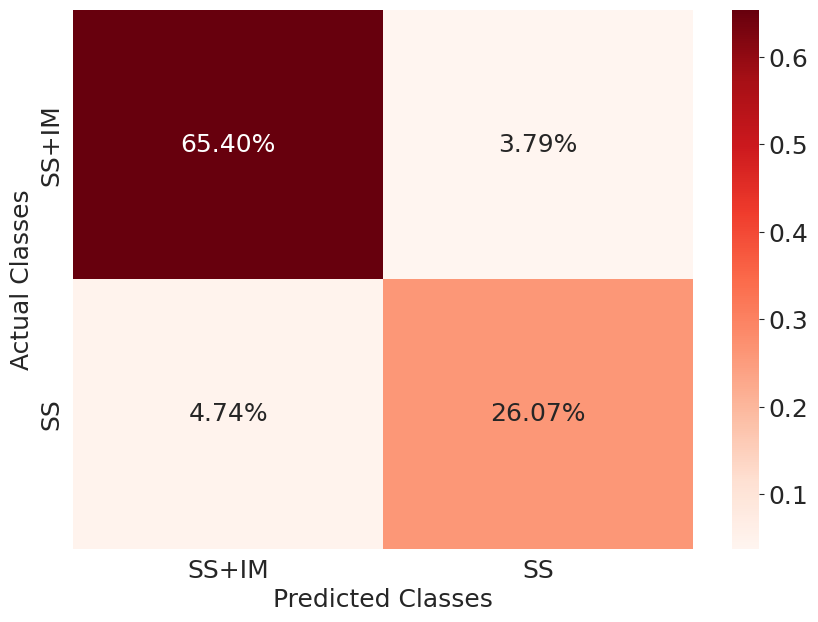

In [ ]:
cfm=confusion_matrix(y_test,dtree)/211
classes =["SS+IM","SS"]
classes_n=["SS+IM","SS"]
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes_n)
plt.figure(figsize = (10,7))
cfm_plot = sns.heatmap(df_cfm, annot=True,cmap ="Reds",fmt='.2%')
cfm_plot.figure.savefig("cfm.png")
cfm_plot.set(xlabel='Predicted Classes', ylabel='Actual Classes')

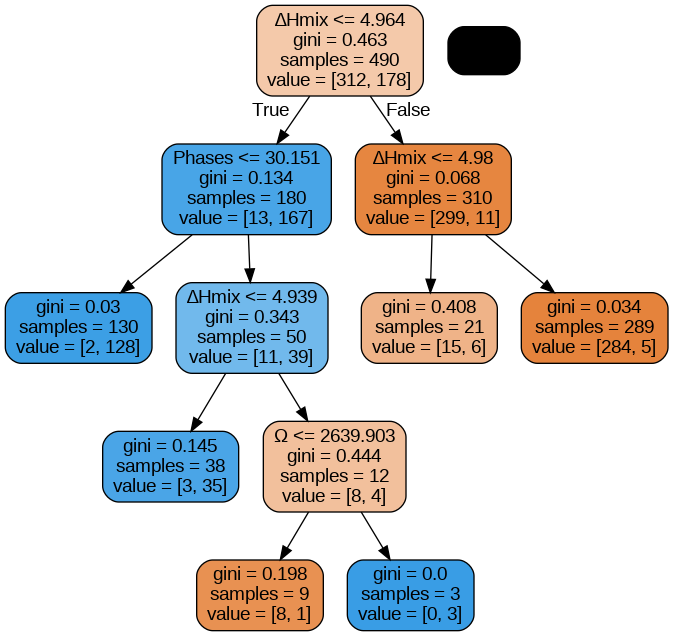

In [ ]:
dot_data = StringIO()
# export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
export_graphviz(grid_search_cv.best_estimator_, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [ ]:
# importance4=dtree.feature_importances_
importance4=grid_search_cv.best_estimator_.feature_importances_

In [ ]:
feature_names=('∆Smix','VEC','∆Hmix','δ','∆χ','Tm','Ω')

In [ ]:
imp4=pd.DataFrame({'feature_names':feature_names,'Importances':importance4})
imp4.sort_values(by='Importances')

,feature_names,Importances
0,∆Smix,0.000000
2,∆Hmix,0.000000
3,δ,0.000000
4,∆χ,0.000000
6,Ω,0.015346
5,Tm,0.018045
1,VEC,0.966609


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[134  12]
 [  4  61]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       146
           1       0.84      0.94      0.88        65

    accuracy                           0.92       211
   macro avg       0.90      0.93      0.91       211
weighted avg       0.93      0.92      0.93       211



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rfc_pred)

0.9241706161137441

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'bootstrap': [False,True],
    'max_depth': [20,30],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3,4],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [1,50,100]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = 4, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False, True], 'max_depth': [20, 30],
                         'max_features': [2, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [1, 50, 100]},
             verbose=2)

In [ ]:
grid_search.best_params_


{'bootstrap': False,
 'max_depth': 20,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
pred1=grid_search.predict(X_test)

In [ ]:
grid_search.score(X_test,y_test)

0.9383886255924171

In [ ]:
print("best score:",grid_search.best_score_)

best score: 0.9571300314230134


In [ ]:

grid_search.score(X_train,y_train)

1.0

In [ ]:
sklearn.metrics.f1_score(y_test,pred1)

0.9037037037037037

In [ ]:
print(confusion_matrix(y_test,pred1))

[[137   9]
 [  4  61]]


[Text(0.5, 37.7222222222222, 'Predicted Classes'),
 Text(85.72222222222221, 0.5, 'Actual Classes')]

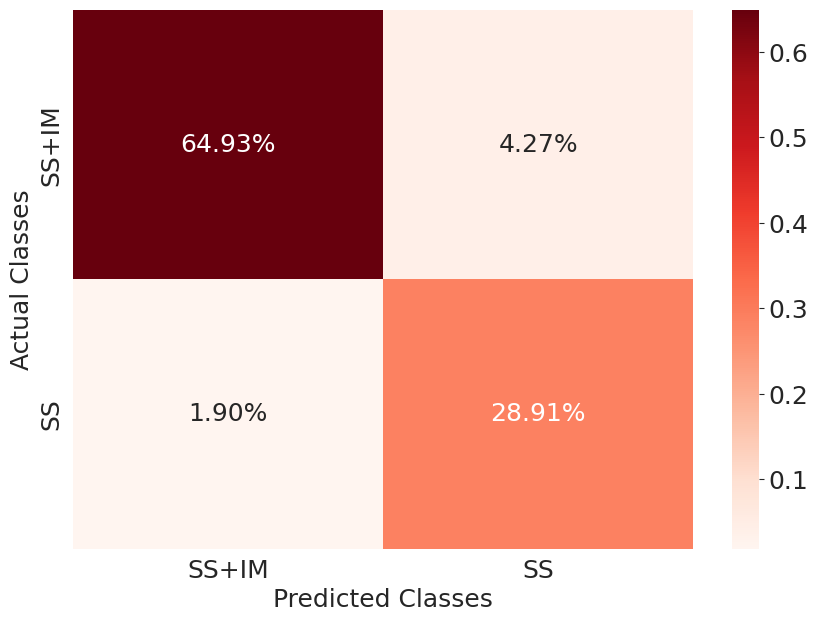

In [ ]:

cfm=confusion_matrix(y_test,pred1)/211
classes =["SS+IM","SS"]
classes_n=["SS+IM","SS"]
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes_n)
plt.figure(figsize = (10,7))
cfm_plot = sns.heatmap(df_cfm, annot=True,cmap ="Reds",fmt='.2%')
cfm_plot.figure.savefig("cfm.png")
cfm_plot.set(xlabel='Predicted Classes', ylabel='Actual Classes')

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
print(grid_search.score(X_test, y_test))

0.9383886255924171


In [ ]:

print(f'Train Accuracy - : {grid_search.score(X_train,y_train):.3f}')
print(f'Test Accuracy - : {grid_search.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.938


In [ ]:
importance5=rfc.feature_importances_

In [ ]:
importance5=rfc.feature_importances_
imp4=pd.DataFrame({'feature_names':feature_names,'Importances':importance5})
imp4.sort_values(by='Importances')

,feature_names,Importances
2,∆Hmix,0.031488
0,∆Smix,0.047850
6,Ω,0.049485
3,δ,0.060606
5,Tm,0.140877
4,∆χ,0.160197
1,VEC,0.509497


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# separate the data
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df.drop('SS/SS+IM',axis=1),df['SS/SS+IM'], test_size=0.3, random_state=0)

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
49/49 [==============================] - 3s 7ms/step - loss: 130.5373 - accuracy: 0.6367
Epoch 2/100
49/49 [==============================] - 0s 5ms/step - loss: 9.6281 - accuracy: 0.5245
Epoch 3/100
49/49 [==============================] - 0s 5ms/step - loss: 0.8305 - accuracy: 0.6204
Epoch 4/100
49/49 [==============================] - 0s 6ms/step - loss: 1.0160 - accuracy: 0.5878
Epoch 5/100
49/49 [==============================] - 0s 5ms/step - loss: 0.8011 - accuracy: 0.6061
Epoch 6/100
49/49 [==============================] - 0s 7ms/step - loss: 0.8088 - accuracy: 0.5980
Epoch 7/100
49/49 [==============================] - 0s 6ms/step - loss: 0.8230 - accuracy: 0.6082
Epoch 8/100
49/49 [==============================] - 0s 5ms/step - loss: 0.6635 - accuracy: 0.6408
Epoch 9/100
49/49 [==============================] - 0s 4ms/step - loss: 0.7707 - accuracy: 0.6245
Epoch 10/100
49/49 [==============================] - 0s 5ms/step - loss: 0.8739 - accuracy: 0.5939
Epoch 1

In [ ]:
ANN_test=69.19
#manual input

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
y_pred

7/7 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[144   2]
 [ 63   2]]


0.6919431279620853

[[144   2]
 [ 63   2]]


[Text(0.5, 37.7222222222222, 'Predicted Classes'),
 Text(85.72222222222221, 0.5, 'Actual Classes')]

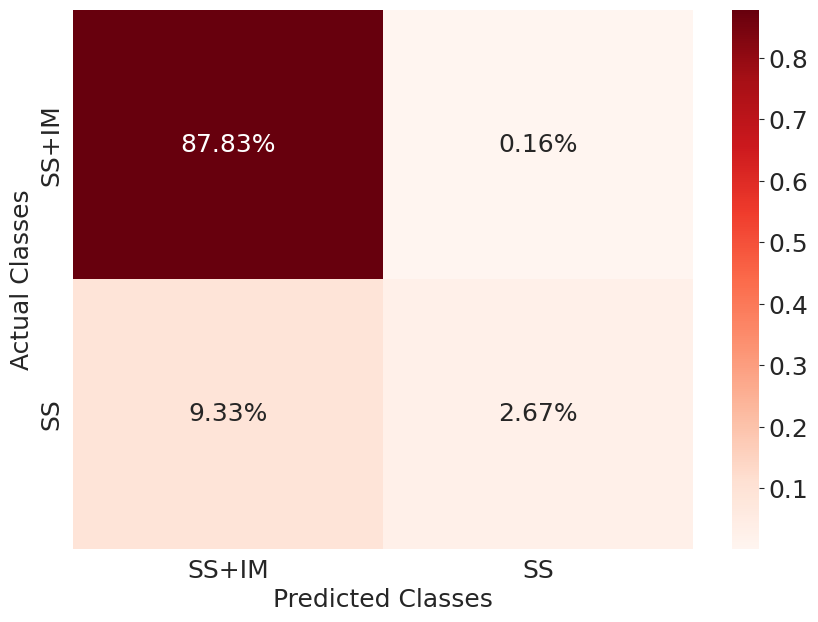

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
cfm=cm/211
#cfm=[[0.8783, 0.0016,],
  #[ 0.0933, 0.0267]]
accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,predictions)/211

classes =["SS+IM","SS"]
classes_n=["SS+IM","SS"]
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes_n)
plt.figure(figsize = (10,7))
cfm_plot = sns.heatmap(df_cfm, annot=True,cmap ="Reds",fmt='.2%')
cfm_plot.figure.savefig("cfm.png")
cfm_plot.set(xlabel='Predicted Classes', ylabel='Actual Classes')

In [ ]:
 model.evaluate(X_train, y_train)

16/16 [==============================] - 0s 2ms/step - loss: 0.7516 - accuracy: 0.6367


[0.7516320943832397, 0.636734664440155]

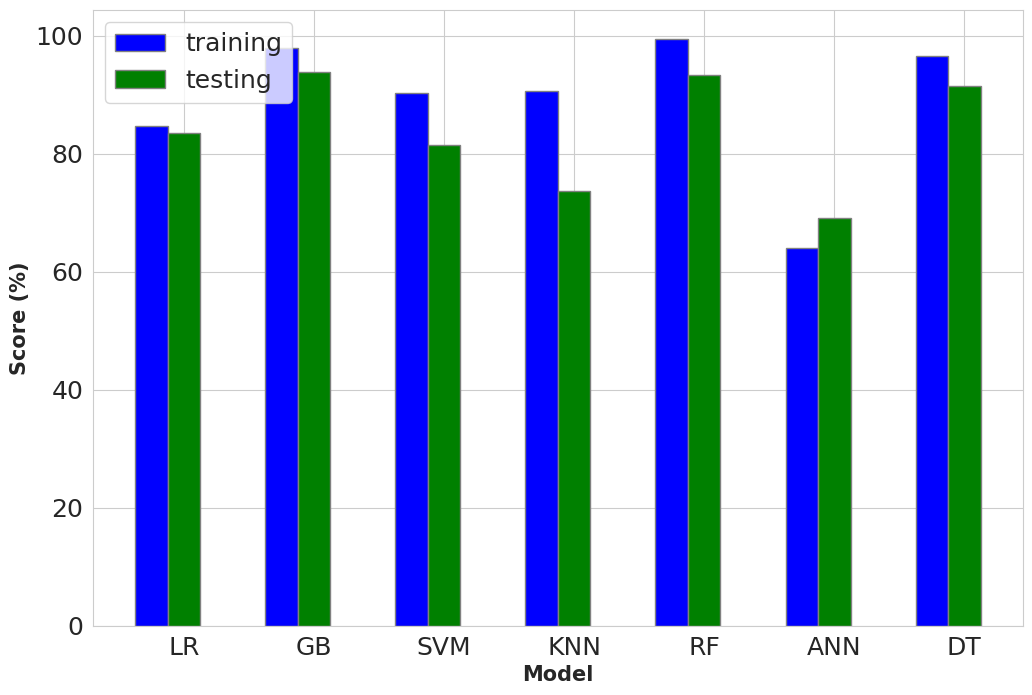

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
training = [84.6, 97.9, 90.2, 90.6, 99.4,64.08,96.5]
testing = [83.4, 93.8, 81.4, 73.6, 93.3,69.1,91.5]


# Set position of bar on X axis
br1 = np.arange(len(training))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, training, color ='b', width = barWidth,
        edgecolor ='grey', label ='training')
plt.bar(br2, testing, color ='g', width = barWidth,
        edgecolor ='grey', label ='testing')


# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Score (%)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(training))],
        ['LR', 'GB', 'SVM', 'KNN', 'RF','ANN','DT'])

plt.legend()
plt.show()